In [ ]:
import pandas as pd
import imblearn
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv("encode3_off.csv")
data.head()

,Unnamed: 0,Protein Annotation,Day21-ETP,sgRNA_vs_Target,TID,MatchResult
0,1,76.54,0.490986,13,0,1
1,2,76.54,0.428038,14,0,0
2,4,76.54,0.143454,14,0,1
3,5,76.54,0.143454,14,0,1
4,10,76.54,0.055372,13,0,0


In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Protein Annotation,Day21-ETP,sgRNA_vs_Target,TID,MatchResult
0,76.54,0.490986,13,0,1
1,76.54,0.428038,14,0,0
2,76.54,0.143454,14,0,1
3,76.54,0.143454,14,0,1
4,76.54,0.055372,13,0,0


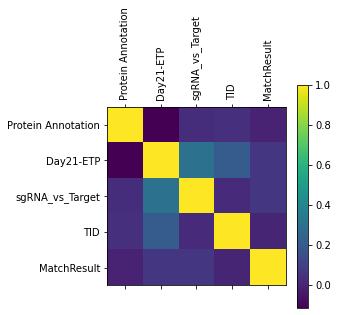

In [ ]:
plt.matshow(data.corr())
plt.xticks(np.arange(5), data.columns, rotation=90)
plt.yticks(np.arange(5), data.columns, rotation=0)
plt.colorbar()
plt.show()

In [ ]:
count = 0
test = pd.DataFrame()
train = pd.DataFrame()
for index, row in data.iterrows():
    count += 1
    if (count%3)==0:
        test = test.append(row)
    else:
        train = train.append(row)

In [ ]:
train1 = train
test1 = test

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15555 entries, 0 to 23331
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day21-ETP           15555 non-null  float64
 1   MatchResult         15555 non-null  float64
 2   Protein Annotation  15555 non-null  float64
 3   TID                 15555 non-null  float64
 4   sgRNA_vs_Target     15555 non-null  float64
dtypes: float64(5)
memory usage: 729.1 KB


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 2 to 23330
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day21-ETP           7777 non-null   float64
 1   MatchResult         7777 non-null   float64
 2   Protein Annotation  7777 non-null   float64
 3   TID                 7777 non-null   float64
 4   sgRNA_vs_Target     7777 non-null   float64
dtypes: float64(5)
memory usage: 364.5 KB


In [ ]:
train1.MatchResult.value_counts()

1.0    12412
0.0     3143
Name: MatchResult, dtype: int64

In [ ]:
test1.MatchResult.value_counts()

1.0    6231
0.0    1546
Name: MatchResult, dtype: int64

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

Score:  0.0037362977248543983
Weights:  [ 1.26656161e-02 -9.50407875e-05 -1.48078775e-02  5.07320396e-03]


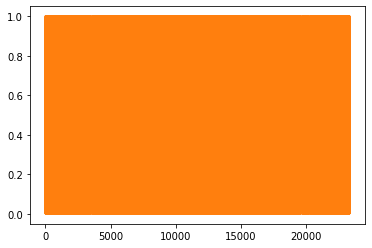

In [ ]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

# **SVM (KERNEL: GAUSSIAN)**

**Model 1 - Imbalanced towards Insertion**

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_gaussian))
print(classification_report(y_test,y_pred_m1_svm_gaussian))

[[  14 1532]
 [  11 6220]]
              precision    recall  f1-score   support

         0.0       0.56      0.01      0.02      1546
         1.0       0.80      1.00      0.89      6231

    accuracy                           0.80      7777
   macro avg       0.68      0.50      0.45      7777
weighted avg       0.75      0.80      0.72      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      14             |        1532               |   1546   |
|  Insertion (1)      |      11             |        6220              |   6231  |
|        TOTAL              |      25             |        7752             |   7777  |

In [ ]:
m1_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m1_svm_gaussian)

In [ ]:
M1_sp_SVM_gaussian=0.80
M1_se_SVM_gaussian=1.00
M1_acc_SVM_gaussian=0.80

In [ ]:
results = pd.DataFrame({'Classifier' : pd.Categorical(["SVM - Gaussian"]),
                        'Model' : pd.Categorical(["Imbalanced - Insertion"]),
                        'Specificity' : M1_sp_SVM_gaussian,
                        'Sensitivity' : M1_se_SVM_gaussian,
                        'Accuracy' : M1_acc_SVM_gaussian,
                        'AUC' : m1_svm_gaussian_auc})

**Model 2 - Manually Balanced**

In [ ]:
train1.MatchResult.value_counts()

1.0    12412
0.0     3143
Name: MatchResult, dtype: int64

In [ ]:
negative_cases = train1[train1['MatchResult'] == 0]
positive_cases = train1[train1['MatchResult'] == 1].sample(3143, random_state=0)
train1_balanced = pd.concat([positive_cases,negative_cases])
train1_balanced.sort_index(inplace=True)

X_train_bal = train1_balanced.drop(['MatchResult'], axis=1)
y_train_bal = train1_balanced['MatchResult']

train1_balanced.MatchResult.value_counts()

1.0    3143
0.0    3143
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_gaussian))
print(classification_report(y_test,y_pred_m2_svm_gaussian))

[[ 859  687]
 [2857 3374]]
              precision    recall  f1-score   support

         0.0       0.23      0.56      0.33      1546
         1.0       0.83      0.54      0.66      6231

    accuracy                           0.54      7777
   macro avg       0.53      0.55      0.49      7777
weighted avg       0.71      0.54      0.59      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      859             |        687               |   1546   |
|  Insertion (1)      |      2857             |        3374              |   6231  |
|        TOTAL              |      3716             |        4061             |   7777  |

In [ ]:
m2_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m2_svm_gaussian)

In [ ]:
M2_sp_SVM_gaussian=0.83
M2_se_SVM_gaussian=0.54
M2_acc_SVM_gaussian=0.54

In [ ]:
svm_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Gaussian", 'Specificity':M2_sp_SVM_gaussian, 'Sensitivity':M2_se_SVM_gaussian, 'Accuracy':M2_acc_SVM_gaussian, 'AUC': m2_svm_gaussian_auc}
results = results.append(svm_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_gaussian))
print(classification_report(y_test,y_pred_m3_svm_gaussian))

[[ 755  791]
 [2379 3852]]
              precision    recall  f1-score   support

         0.0       0.24      0.49      0.32      1546
         1.0       0.83      0.62      0.71      6231

    accuracy                           0.59      7777
   macro avg       0.54      0.55      0.52      7777
weighted avg       0.71      0.59      0.63      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      755             |        791               |   1546   |
|  Insertion (1)      |      2379             |        3852              |   6231  |
|        TOTAL              |      3134             |        4643             |   7777  |

In [ ]:
m3_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m3_svm_gaussian)

In [ ]:
M3_sp_SVM_gaussian=0.83
M3_se_SVM_gaussian=0.62
M3_acc_SVM_gaussian=0.59

In [ ]:
svm_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Gaussian", 'Specificity':M3_sp_SVM_gaussian, 'Sensitivity':M3_se_SVM_gaussian, 'Accuracy':M3_acc_SVM_gaussian, 'AUC': m3_svm_gaussian_auc}
results = results.append(svm_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Deletion**

In [ ]:
train1.MatchResult.value_counts()

1.0    12412
0.0     3143
Name: MatchResult, dtype: int64

In [ ]:
positive_cases = train1[train1['MatchResult'] == 1].sample(1047, random_state=0)
negative_cases = train1[train1['MatchResult'] == 0].sample(2096, random_state=0)
train1_imbalanced = pd.concat([positive_cases,negative_cases])
train1_imbalanced.sort_index(inplace=True)

X_train_imbal = train1_imbalanced.drop(['MatchResult'], axis=1)
y_train_imbal = train1_imbalanced['MatchResult']
# AFTER
train1_imbalanced.MatchResult.value_counts()

0.0    2096
1.0    1047
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_gaussian))
print(classification_report(y_test,y_pred_m4_svm_gaussian))

[[1448   98]
 [5559  672]]
              precision    recall  f1-score   support

         0.0       0.21      0.94      0.34      1546
         1.0       0.87      0.11      0.19      6231

    accuracy                           0.27      7777
   macro avg       0.54      0.52      0.27      7777
weighted avg       0.74      0.27      0.22      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1448             |        98               |   1546   |
|  Insertion (1)      |      5559             |        672              |   6231  |
|        TOTAL              |      7007             |        770             |   7777  |

In [ ]:
m4_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m4_svm_gaussian)

In [ ]:
M4_sp_SVM_gaussian=0.87
M4_se_SVM_gaussian=0.11
M4_acc_SVM_gaussian=0.27

In [ ]:
svm_gaussian_m4 = {'Model':"Imbalanced - Deletion", 'Classifier':"SVM - Gaussian", 'Specificity':M4_sp_SVM_gaussian, 'Sensitivity':M4_se_SVM_gaussian, 'Accuracy':M4_acc_SVM_gaussian, 'AUC': m4_svm_gaussian_auc}
results = results.append(svm_gaussian_m4, ignore_index=True)

# **SVM (KERNEL: POLYNOMIAL)**

**Model 1 - Imbalanced towards Insertion**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_polynomial))
print(classification_report(y_test,y_pred_m1_svm_polynomial))

[[   0 1546]
 [   0 6231]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1546
         1.0       0.80      1.00      0.89      6231

    accuracy                           0.80      7777
   macro avg       0.40      0.50      0.44      7777
weighted avg       0.64      0.80      0.71      7777



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      0             |        1546               |   1546   |
|  Insertion (1)      |      0             |        6231              |   6231  |
|        TOTAL              |      0             |        7777             |   7777  |

In [ ]:
m1_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m1_svm_polynomial)

In [ ]:
M1_sp_SVM_polynomial=0.80
M1_se_SVM_polynomial=1.00
M1_acc_SVM_polynomial=0.80

In [ ]:
svm_polynomial_m1 = {'Model':"Imbalanced - Insertion", 'Classifier':"SVM - Polynomial", 'Specificity':M1_sp_SVM_polynomial, 'Sensitivity':M1_se_SVM_polynomial, 'Accuracy':M1_acc_SVM_polynomial, 'AUC': m1_svm_polynomial_auc}
results = results.append(svm_polynomial_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_polynomial))
print(classification_report(y_test,y_pred_m2_svm_polynomial))

[[1325  221]
 [4829 1402]]
              precision    recall  f1-score   support

         0.0       0.22      0.86      0.34      1546
         1.0       0.86      0.23      0.36      6231

    accuracy                           0.35      7777
   macro avg       0.54      0.54      0.35      7777
weighted avg       0.73      0.35      0.35      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1325             |        221               |   1546   |
|  Insertion (1)      |      4829             |        1402              |   6231  |
|        TOTAL              |      6154             |        1623             |   7777  |

In [ ]:
m2_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m2_svm_polynomial)

In [ ]:
M2_sp_SVM_polynomial=0.86
M2_se_SVM_polynomial=0.23
M2_acc_SVM_polynomial=0.35

In [ ]:
svm_polynomial_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Polynomial", 'Specificity':M2_sp_SVM_polynomial, 'Sensitivity':M2_se_SVM_polynomial, 'Accuracy':M2_acc_SVM_polynomial, 'AUC': m2_svm_polynomial_auc}
results = results.append(svm_polynomial_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_polynomial))
print(classification_report(y_test,y_pred_m3_svm_polynomial))

[[1302  244]
 [4823 1408]]
              precision    recall  f1-score   support

         0.0       0.21      0.84      0.34      1546
         1.0       0.85      0.23      0.36      6231

    accuracy                           0.35      7777
   macro avg       0.53      0.53      0.35      7777
weighted avg       0.73      0.35      0.35      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1302             |        244               |   1546   |
|  Insertion (1)      |      4823             |        1408              |   6231  |
|        TOTAL              |      6125             |        1652             |   7777  |

In [ ]:
m3_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m3_svm_polynomial)

In [ ]:
M3_sp_SVM_polynomial=0.85
M3_se_SVM_polynomial=0.23
M3_acc_SVM_polynomial=0.35

In [ ]:
svm_polynomial_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Polynomial", 'Specificity':M3_sp_SVM_polynomial, 'Sensitivity':M3_se_SVM_polynomial, 'Accuracy':M3_acc_SVM_polynomial, 'AUC': m3_svm_polynomial_auc}
results = results.append(svm_polynomial_m3, ignore_index=True)

**Model 4 - Imbalanced towards Deletion**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_polynomial))
print(classification_report(y_test,y_pred_m4_svm_polynomial))

[[1546    0]
 [6231    0]]
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33      1546
         1.0       0.00      0.00      0.00      6231

    accuracy                           0.20      7777
   macro avg       0.10      0.50      0.17      7777
weighted avg       0.04      0.20      0.07      7777



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1546             |        0               |   1546   |
|  Insertion (1)      |      6231             |        0              |   6231  |
|        TOTAL              |      7777             |        0             |   7777  |

In [ ]:
m4_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m4_svm_polynomial)

In [ ]:
M4_sp_SVM_polynomial=0.00
M4_se_SVM_polynomial=0.00
M4_acc_SVM_polynomial=0.20

In [ ]:
svm_polynomial_m4 = {'Model':"Imbalanced - Deletion", 'Classifier':"SVM - Polynomial", 'Specificity':M4_sp_SVM_polynomial, 'Sensitivity':M4_se_SVM_polynomial, 'Accuracy':M4_acc_SVM_polynomial, 'AUC': m4_svm_polynomial_auc}
results = results.append(svm_polynomial_m4, ignore_index=True)

# **SVM (KERNEL: SIGMOID)**

**Model 1 - Imbalanced towards Insertion**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_sigmoid))
print(classification_report(y_test,y_pred_m1_svm_sigmoid))

[[ 301 1245]
 [1247 4984]]
              precision    recall  f1-score   support

         0.0       0.19      0.19      0.19      1546
         1.0       0.80      0.80      0.80      6231

    accuracy                           0.68      7777
   macro avg       0.50      0.50      0.50      7777
weighted avg       0.68      0.68      0.68      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      301             |        1245               |   1546   |
|  Insertion (1)      |      1247             |        4984              |   6231  |
|        TOTAL              |      1548             |        6229             |   7777  |

In [ ]:
m1_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m1_svm_sigmoid)

In [ ]:
M1_sp_SVM_sigmoid=0.80
M1_se_SVM_sigmoid=0.80
M1_acc_SVM_sigmoid=0.68

In [ ]:
svm_sigmoid_m1 = {'Model':"Imbalanced - Insertion", 'Classifier':"SVM - Sigmoid", 'Specificity':M1_sp_SVM_sigmoid, 'Sensitivity':M1_se_SVM_sigmoid, 'Accuracy':M1_acc_SVM_sigmoid, 'AUC': m1_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_sigmoid))
print(classification_report(y_test,y_pred_m2_svm_sigmoid))

[[ 743  803]
 [3107 3124]]
              precision    recall  f1-score   support

         0.0       0.19      0.48      0.28      1546
         1.0       0.80      0.50      0.62      6231

    accuracy                           0.50      7777
   macro avg       0.49      0.49      0.45      7777
weighted avg       0.68      0.50      0.55      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      743             |        803               |   1546   |
|  Insertion (1)      |      3107             |        3124              |   6231  |
|        TOTAL              |      3850             |        3927             |   7777  |

In [ ]:
m2_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m2_svm_sigmoid)

In [ ]:
M2_sp_SVM_sigmoid=0.80
M2_se_SVM_sigmoid=0.50
M2_acc_SVM_sigmoid=0.50

In [ ]:
svm_sigmoid_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Sigmoid", 'Specificity':M2_sp_SVM_sigmoid, 'Sensitivity':M2_se_SVM_sigmoid, 'Accuracy':M2_acc_SVM_sigmoid, 'AUC': m2_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_sigmoid))
print(classification_report(y_test,y_pred_m3_svm_sigmoid))

[[ 752  794]
 [3132 3099]]
              precision    recall  f1-score   support

         0.0       0.19      0.49      0.28      1546
         1.0       0.80      0.50      0.61      6231

    accuracy                           0.50      7777
   macro avg       0.49      0.49      0.44      7777
weighted avg       0.68      0.50      0.55      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      752             |        794               |   1546   |
|  Insertion (1)      |      3132             |        3099              |   6231  |
|        TOTAL              |      3884             |        3893             |   7777  |

In [ ]:
m3_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m3_svm_sigmoid)

In [ ]:
M3_sp_SVM_sigmoid=0.80
M3_se_SVM_sigmoid=0.50
M3_acc_SVM_sigmoid=0.50

In [ ]:
svm_sigmoid_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Sigmoid", 'Specificity':M3_sp_SVM_sigmoid, 'Sensitivity':M3_se_SVM_sigmoid, 'Accuracy':M3_acc_SVM_sigmoid, 'AUC': m3_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m3, ignore_index=True)

**Model 4 - Imbalanced towards Deletion**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_sigmoid))
print(classification_report(y_test,y_pred_m4_svm_sigmoid))

[[1039  507]
 [4264 1967]]
              precision    recall  f1-score   support

         0.0       0.20      0.67      0.30      1546
         1.0       0.80      0.32      0.45      6231

    accuracy                           0.39      7777
   macro avg       0.50      0.49      0.38      7777
weighted avg       0.68      0.39      0.42      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1039             |        507               |   1546   |
|  Insertion (1)      |      4264             |        1967              |   6231  |
|        TOTAL              |      5303             |        2474             |   7777  |

In [ ]:
m4_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m4_svm_sigmoid)

In [ ]:
M4_sp_SVM_sigmoid=0.80
M4_se_SVM_sigmoid=0.32
M4_acc_SVM_sigmoid=0.39

In [ ]:
svm_sigmoid_m4 = {'Model':"Imbalanced - Deletion", 'Classifier':"SVM - Sigmoid", 'Specificity':M4_sp_SVM_sigmoid, 'Sensitivity':M4_se_SVM_sigmoid, 'Accuracy':M4_acc_SVM_sigmoid, 'AUC': m4_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m4, ignore_index=True)

# **NAIVE BAYES (GAUSSIAN)**

**Model 1 - Imbalanced towards Insertion**

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_gaussian))
print(classification_report(y_test,y_pred_m1_naive_gaussian))

[[   0 1546]
 [   0 6231]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1546
         1.0       0.80      1.00      0.89      6231

    accuracy                           0.80      7777
   macro avg       0.40      0.50      0.44      7777
weighted avg       0.64      0.80      0.71      7777



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      0             |        1546               |   1546   |
|  Insertion (1)      |      0             |        6231              |   6231  |
|        TOTAL              |      0             |        7777             |   7777  |

In [ ]:
m1_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m1_naive_gaussian)

In [ ]:
M1_sp_naive_gaussian=0.80
M1_se_naive_gaussian=1.00
M1_acc_naive_gaussian=0.80

In [ ]:
naive_gaussian_m1 = {'Model':"Imbalanced - Insertion", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M1_sp_naive_gaussian, 'Sensitivity':M1_se_naive_gaussian, 'Accuracy':M1_acc_naive_gaussian, 'AUC': m1_naive_gaussian_auc}
results = results.append(naive_gaussian_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_gaussian))
print(classification_report(y_test,y_pred_m2_naive_gaussian))

[[ 993  553]
 [3708 2523]]
              precision    recall  f1-score   support

         0.0       0.21      0.64      0.32      1546
         1.0       0.82      0.40      0.54      6231

    accuracy                           0.45      7777
   macro avg       0.52      0.52      0.43      7777
weighted avg       0.70      0.45      0.50      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      993             |        553               |   1546   |
|  Insertion (1)      |      3708             |        2523              |   6231  |
|        TOTAL              |      4701             |        3076             |   7777  |

In [ ]:
m2_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m2_naive_gaussian)

In [ ]:
M2_sp_naive_gaussian=0.82
M2_se_naive_gaussian=0.40
M2_acc_naive_gaussian=0.45

In [ ]:
naive_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M2_sp_naive_gaussian, 'Sensitivity':M2_se_naive_gaussian, 'Accuracy':M2_acc_naive_gaussian, 'AUC': m2_naive_gaussian_auc}
results = results.append(naive_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_gaussian))
print(classification_report(y_test,y_pred_m3_naive_gaussian))

[[ 989  557]
 [3588 2643]]
              precision    recall  f1-score   support

         0.0       0.22      0.64      0.32      1546
         1.0       0.83      0.42      0.56      6231

    accuracy                           0.47      7777
   macro avg       0.52      0.53      0.44      7777
weighted avg       0.70      0.47      0.51      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      989             |        557               |   1546   |
|  Insertion (1)      |      3588             |        2643              |   6231  |
|        TOTAL              |      4577             |        3200             |   7777  |

In [ ]:
m3_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m3_naive_gaussian)

In [ ]:
M3_sp_naive_gaussian=0.83
M3_se_naive_gaussian=0.42
M3_acc_naive_gaussian=0.47

In [ ]:
naive_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M3_sp_naive_gaussian, 'Sensitivity':M3_se_naive_gaussian, 'Accuracy':M3_acc_naive_gaussian, 'AUC': m3_naive_gaussian_auc}
results = results.append(naive_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Deletion**

In [ ]:
gnb = GaussianNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_gaussian))
print(classification_report(y_test,y_pred_m4_naive_gaussian))

[[1450   96]
 [5522  709]]
              precision    recall  f1-score   support

         0.0       0.21      0.94      0.34      1546
         1.0       0.88      0.11      0.20      6231

    accuracy                           0.28      7777
   macro avg       0.54      0.53      0.27      7777
weighted avg       0.75      0.28      0.23      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1450             |        96               |   1546   |
|  Insertion (1)      |      5522             |        709              |   6231  |
|        TOTAL              |      6972             |        805             |   7777  |

In [ ]:
m4_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m4_naive_gaussian)

In [ ]:
M4_sp_naive_gaussian=0.88
M4_se_naive_gaussian=0.11
M4_acc_naive_gaussian=0.28

In [ ]:
naive_gaussian_m4 = {'Model':"Imbalanced - Deletion", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M4_sp_naive_gaussian, 'Sensitivity':M4_se_naive_gaussian, 'Accuracy':M4_acc_naive_gaussian, 'AUC': m4_naive_gaussian_auc}
results = results.append(naive_gaussian_m4, ignore_index=True)

# **Naive Bayes (Bernoulli)**

**Model 1 - Imbalanced towards Insertion**

In [ ]:
gnb = BernoulliNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_bernoulli))
print(classification_report(y_test,y_pred_m1_naive_bernoulli))

[[   0 1546]
 [   0 6231]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1546
         1.0       0.80      1.00      0.89      6231

    accuracy                           0.80      7777
   macro avg       0.40      0.50      0.44      7777
weighted avg       0.64      0.80      0.71      7777



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      0             |        1546               |   1546   |
|  Insertion (1)      |      0             |        6231              |   6231  |
|        TOTAL              |      0             |        7777             |   7777  |

In [ ]:
m1_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m1_naive_bernoulli)

In [ ]:
M1_sp_naive_bernoulli=0.80
M1_se_naive_bernoulli=1.00
M1_acc_naive_bernoulli=0.80

In [ ]:
naive_bernoullii_m1 = {'Model':"Imbalanced - Insertion", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M1_sp_naive_bernoulli, 'Sensitivity':M1_se_naive_bernoulli, 'Accuracy':M1_acc_naive_bernoulli, 'AUC':m1_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_bernoulli))
print(classification_report(y_test,y_pred_m2_naive_bernoulli))

[[1322  224]
 [4992 1239]]
              precision    recall  f1-score   support

         0.0       0.21      0.86      0.34      1546
         1.0       0.85      0.20      0.32      6231

    accuracy                           0.33      7777
   macro avg       0.53      0.53      0.33      7777
weighted avg       0.72      0.33      0.32      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1322             |        224               |   1546   |
|  Insertion (1)      |      4992             |        1239              |   6231  |
|        TOTAL              |      6314             |        1463             |   7777  |

In [ ]:
m2_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m2_naive_bernoulli)

In [ ]:
M2_sp_naive_bernoulli=0.85
M2_se_naive_bernoulli=0.20
M2_acc_naive_bernoulli=0.33

In [ ]:
naive_bernoullii_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M2_sp_naive_bernoulli, 'Sensitivity':M2_se_naive_bernoulli, 'Accuracy':M2_acc_naive_bernoulli, 'AUC':m2_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_bernoulli))
print(classification_report(y_test,y_pred_m3_naive_bernoulli))

[[ 896  650]
 [3295 2936]]
              precision    recall  f1-score   support

         0.0       0.21      0.58      0.31      1546
         1.0       0.82      0.47      0.60      6231

    accuracy                           0.49      7777
   macro avg       0.52      0.53      0.46      7777
weighted avg       0.70      0.49      0.54      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      896             |        650               |   1546   |
|  Insertion (1)      |      3295             |        2936              |   6231  |
|        TOTAL              |      4191             |        3586             |   7777  |

In [ ]:
m3_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m3_naive_bernoulli)

In [ ]:
M3_sp_naive_bernoulli=0.82
M3_se_naive_bernoulli=0.47
M3_acc_naive_bernoulli=0.49

In [ ]:
naive_bernoullii_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M3_sp_naive_bernoulli, 'Sensitivity':M3_se_naive_bernoulli, 'Accuracy':M3_acc_naive_bernoulli, 'AUC':m3_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m3, ignore_index=True)

**Model 4 - Imbalanced towards Deletion**

In [ ]:
gnb = BernoulliNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_bernoulli))
print(classification_report(y_test,y_pred_m4_naive_bernoulli))

[[1546    0]
 [6231    0]]
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33      1546
         1.0       0.00      0.00      0.00      6231

    accuracy                           0.20      7777
   macro avg       0.10      0.50      0.17      7777
weighted avg       0.04      0.20      0.07      7777



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1546             |        0               |   1546   |
|  Insertion (1)      |      6231             |        0              |   6231  |
|        TOTAL              |      7777             |        0             |   7777  |

In [ ]:
m4_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m4_naive_bernoulli)

In [ ]:
M4_sp_naive_bernoulli=0.00
M4_se_naive_bernoulli=0.00
M4_acc_naive_bernoulli=0.20

In [ ]:
naive_bernoullii_m4 = {'Model':"Imbalanced - Deletion", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M4_sp_naive_bernoulli, 'Sensitivity':M4_se_naive_bernoulli, 'Accuracy':M4_acc_naive_bernoulli, 'AUC':m4_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m4, ignore_index=True)

# **Random Forest**



**Model 1 - Imbalanced towards Insertion**

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m1_rf))
print(classification_report(y_test,y_pred_m1_rf))

[[ 692  854]
 [ 273 5958]]
              precision    recall  f1-score   support

         0.0       0.72      0.45      0.55      1546
         1.0       0.87      0.96      0.91      6231

    accuracy                           0.86      7777
   macro avg       0.80      0.70      0.73      7777
weighted avg       0.84      0.86      0.84      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      692             |        854               |   1546   |
|  Insertion (1)      |      273             |        5958              |   6231  |
|        TOTAL              |      965             |        6812             |   7777  |

In [ ]:
m1_rf_auc = roc_auc_score(y_test, y_pred_m1_rf)
m1_rf_auc

0.70189676746676

In [ ]:
M1_sp_rf=0.87
M1_se_rf=0.95
M1_acc_rf=0.85

In [ ]:
rf_m1 = {'Model':"Imbalanced - Insertion", 'Classifier':"Random Forest", 'Specificity':M1_sp_rf, 'Sensitivity':M1_se_rf, 'Accuracy':M1_acc_rf, 'AUC':m1_rf_auc}
results = results.append(rf_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m2_rf))
print(classification_report(y_test,y_pred_m2_rf))

[[1068  478]
 [2512 3719]]
              precision    recall  f1-score   support

         0.0       0.30      0.69      0.42      1546
         1.0       0.89      0.60      0.71      6231

    accuracy                           0.62      7777
   macro avg       0.59      0.64      0.56      7777
weighted avg       0.77      0.62      0.65      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1055             |        191               |   1546   |
|  Insertion (1)      |      2510             |        3721              |   6231  |
|        TOTAL              |      3565             |        3912             |   7777  |

In [ ]:
m2_rf_auc = roc_auc_score(y_test, y_pred_m2_rf)

In [ ]:
M2_sp_rf=0.88
M2_se_rf=0.60
M2_acc_rf=0.61

In [ ]:
rf_m2 = {'Model':"Balanced - Manual", 'Classifier':"Random Forest", 'Specificity':M2_sp_rf, 'Sensitivity':M2_se_rf, 'Accuracy':M2_acc_rf, 'AUC':m2_rf_auc}
results = results.append(rf_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m3_rf))
print(classification_report(y_test,y_pred_m3_rf))

[[ 765  781]
 [ 728 5503]]
              precision    recall  f1-score   support

         0.0       0.51      0.49      0.50      1546
         1.0       0.88      0.88      0.88      6231

    accuracy                           0.81      7777
   macro avg       0.69      0.69      0.69      7777
weighted avg       0.80      0.81      0.80      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      774             |        772               |   1546   |
|  Insertion (1)      |      724             |        5507              |   6231  |
|        TOTAL              |      1498             |        6279             |   7777  |

In [ ]:
m3_rf_auc = roc_auc_score(y_test, y_pred_m3_rf)

In [ ]:
M3_sp_rf=0.88
M3_se_rf=0.88
M3_acc_rf=0.81

In [ ]:
rf_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Random Forest", 'Specificity':M3_sp_rf, 'Sensitivity':M3_se_rf, 'Accuracy':M3_acc_rf, 'AUC':m3_rf_auc}
results = results.append(rf_m3, ignore_index=True)

**Model 4 - Imbalanced towards Deletion**

In [ ]:
rf = RandomForestClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m4_rf))
print(classification_report(y_test,y_pred_m4_rf))

[[1328  218]
 [4536 1695]]
              precision    recall  f1-score   support

         0.0       0.23      0.86      0.36      1546
         1.0       0.89      0.27      0.42      6231

    accuracy                           0.39      7777
   macro avg       0.56      0.57      0.39      7777
weighted avg       0.75      0.39      0.40      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1321             |        225               |   1546   |
|  Insertion (1)      |      4554             |        1677              |   6231  |
|        TOTAL              |      5875             |        1902             |   7777  |

In [ ]:
m4_rf_auc = roc_auc_score(y_test, y_pred_m4_rf)
m4_rf_auc

0.565508953168473

In [ ]:
M4_sp_rf=0.88
M4_se_rf=0.27
M4_acc_rf=0.39

In [ ]:
rf_m4 = {'Model':"Imbalanced - Deletion", 'Classifier':"Random Forest", 'Specificity':M4_sp_rf, 'Sensitivity':M4_se_rf, 'Accuracy':M4_acc_rf, 'AUC':m4_rf_auc}
results = results.append(rf_m4, ignore_index=True)

# **LightGBM**

**Model 1 - Imbalanced towards Insertion**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_lgb))
print(classification_report(y_test,y_pred_m1_lgb))

[[  34 1512]
 [  18 6213]]
              precision    recall  f1-score   support

         0.0       0.65      0.02      0.04      1546
         1.0       0.80      1.00      0.89      6231

    accuracy                           0.80      7777
   macro avg       0.73      0.51      0.47      7777
weighted avg       0.77      0.80      0.72      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      34             |        1512               |   1546   |
|  Insertion (1)      |      18             |        6213              |   6231  |
|        TOTAL              |      52             |        7725             |   7777  |

In [ ]:
m1_lgb_auc = roc_auc_score(y_test, y_pred_m1_lgb)

In [ ]:
M1_sp_lgb=0.80
M1_se_lgb=1.00
M1_acc_lgb=0.80

In [ ]:
lgb_m1 = {'Model':"Imbalanced - Insertion", 'Classifier':"Light GBM", 'Specificity':M1_sp_lgb, 'Sensitivity':M1_se_lgb, 'Accuracy':M1_acc_lgb, 'AUC':m1_lgb_auc}
results = results.append(lgb_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_lgb))
print(classification_report(y_test,y_pred_m2_lgb))

[[1015  531]
 [2933 3298]]
              precision    recall  f1-score   support

         0.0       0.26      0.66      0.37      1546
         1.0       0.86      0.53      0.66      6231

    accuracy                           0.55      7777
   macro avg       0.56      0.59      0.51      7777
weighted avg       0.74      0.55      0.60      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1015             |        531               |   1546   |
|  Insertion (1)      |      2933             |        3298              |   6231  |
|        TOTAL              |      3948             |        3829             |   7777  |

In [ ]:
m2_lgb_auc = roc_auc_score(y_test, y_pred_m2_lgb)

In [ ]:
M2_sp_lgb=0.86
M2_se_lgb=0.53
M2_acc_lgb=0.55

In [ ]:
lgb_m2 = {'Model':"Balanced - Manual", 'Classifier':"Light GBM", 'Specificity':M2_sp_lgb, 'Sensitivity':M2_se_lgb, 'Accuracy':M2_acc_lgb, 'AUC':m2_lgb_auc}
results = results.append(lgb_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_lgb))
print(classification_report(y_test,y_pred_m3_lgb))

[[ 181 1365]
 [ 302 5929]]
              precision    recall  f1-score   support

         0.0       0.37      0.12      0.18      1546
         1.0       0.81      0.95      0.88      6231

    accuracy                           0.79      7777
   macro avg       0.59      0.53      0.53      7777
weighted avg       0.73      0.79      0.74      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      181             |        1365               |   1546   |
|  Insertion (1)      |      302             |        5929              |   6231  |
|        TOTAL              |      483             |        7294             |   7777  |

In [ ]:
m3_lgb_auc = roc_auc_score(y_test, y_pred_m3_lgb)

In [ ]:
M3_sp_lgb=0.81
M3_se_lgb=0.95
M3_acc_lgb=0.79

In [ ]:
lgb_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Light GBM", 'Specificity':M3_sp_lgb, 'Sensitivity':M3_se_lgb, 'Accuracy':M3_acc_lgb, 'AUC':m3_lgb_auc}
results = results.append(lgb_m3, ignore_index=True)

**Model 4 - Imbalanced towards Deletion**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_lgb))
print(classification_report(y_test,y_pred_m4_lgb))

[[1383  163]
 [5002 1229]]
              precision    recall  f1-score   support

         0.0       0.22      0.89      0.35      1546
         1.0       0.88      0.20      0.32      6231

    accuracy                           0.34      7777
   macro avg       0.55      0.55      0.34      7777
weighted avg       0.75      0.34      0.33      7777



| ACTUAL\PREDICTED          | Deletion (0) | Insertion (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Deletion (0)|      1383             |        163               |   1546   |
|  Insertion (1)      |      5002             |        1229              |   6231  |
|        TOTAL              |      6385             |        1392             |   7777  |

In [ ]:
m4_lgb_auc = roc_auc_score(y_test, y_pred_m4_lgb)

In [ ]:
M4_sp_lgb=0.88
M4_se_lgb=0.20
M4_acc_lgb=0.34

In [ ]:
lgb_m4 = {'Model':"Imbalanced - Deletion", 'Classifier':"Light GBM", 'Specificity':M4_sp_lgb, 'Sensitivity':M4_se_lgb, 'Accuracy':M4_acc_lgb, 'AUC': m4_lgb_auc}
results = results.append(lgb_m4, ignore_index=True)

In [ ]:
#results.drop(results.tail(4).index,inplace=True)

In [ ]:
outfile = 'result3_off.csv'
results.to_csv(outfile)

In [ ]:
results.sort_values(by='AUC', ascending=False)

,Classifier,Model,Specificity,Sensitivity,Accuracy,AUC
20,Random Forest,Imbalanced - Insertion,0.87,0.95,0.85,0.703519
22,Random Forest,Balanced - SMOTE,0.88,0.88,0.81,0.690525
21,Random Forest,Balanced - Manual,0.88,0.60,0.61,0.643018
25,Light GBM,Balanced - Manual,0.86,0.53,0.55,0.592911
23,Random Forest,Imbalanced - Deletion,0.88,0.27,0.39,0.562465
2,SVM - Gaussian,Balanced - SMOTE,0.83,0.62,0.59,0.553278
1,SVM - Gaussian,Balanced - Manual,0.83,0.54,0.54,0.548557
27,Light GBM,Imbalanced - Deletion,0.88,0.20,0.34,0.545903
5,SVM - Polynomial,Balanced - Manual,0.86,0.23,0.35,0.541027
26,Light GBM,Balanced - SMOTE,0.81,0.95,0.79,0.534304


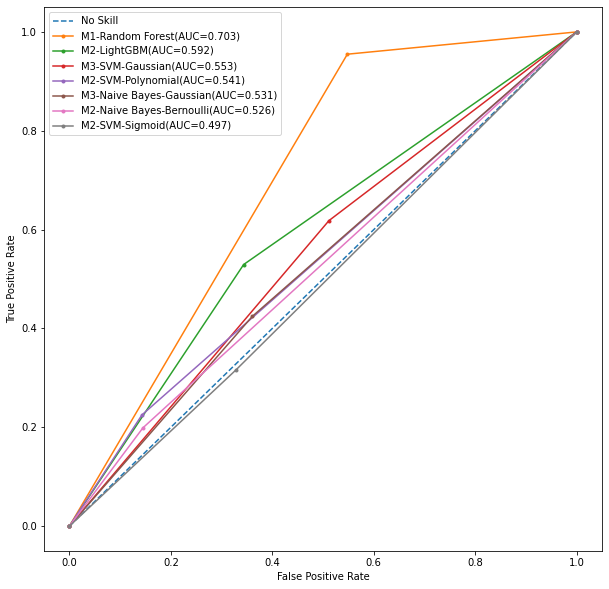

In [ ]:
# Top Classifiers

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
m1_rf_fpr, m1_rf_tpr, _ = roc_curve(y_test, y_pred_m1_rf)
m2_lgb_fpr, m2_lgb_tpr, _ = roc_curve(y_test, y_pred_m2_lgb)
m3_svm_gaussian_fpr, m3_svm_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_svm_gaussian)
m2_svm_polynomial_fpr, m2_svm_polynomial_tpr, _ = roc_curve(y_test, y_pred_m2_svm_polynomial)
m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_naive_gaussian)
m2_naive_bernoulli_fpr, m2_naive_bernoulli_tpr, _ = roc_curve(y_test, y_pred_m2_naive_bernoulli)
m4_svm_sigmoid_fpr, m4_svm_sigmoid_tpr, _ = roc_curve(y_test, y_pred_m4_svm_sigmoid)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m1_rf_fpr, m1_rf_tpr, marker='.', label='M1-Random Forest(AUC=0.703)')
pyplot.plot(m2_lgb_fpr, m2_lgb_tpr, marker='.', label='M2-LightGBM(AUC=0.592)')
pyplot.plot(m3_svm_gaussian_fpr, m3_svm_gaussian_tpr, marker='.', label='M3-SVM-Gaussian(AUC=0.553)')
pyplot.plot(m2_svm_polynomial_fpr, m2_svm_polynomial_tpr, marker='.', label='M2-SVM-Polynomial(AUC=0.541)')
pyplot.plot(m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, marker='.', label='M3-Naive Bayes-Gaussian(AUC=0.531)')
pyplot.plot(m2_naive_bernoulli_fpr, m2_naive_bernoulli_tpr, marker='.', label='M2-Naive Bayes-Bernoulli(AUC=0.526)')
pyplot.plot(m4_svm_sigmoid_fpr, m4_svm_sigmoid_tpr, marker='.', label='M2-SVM-Sigmoid(AUC=0.497)')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

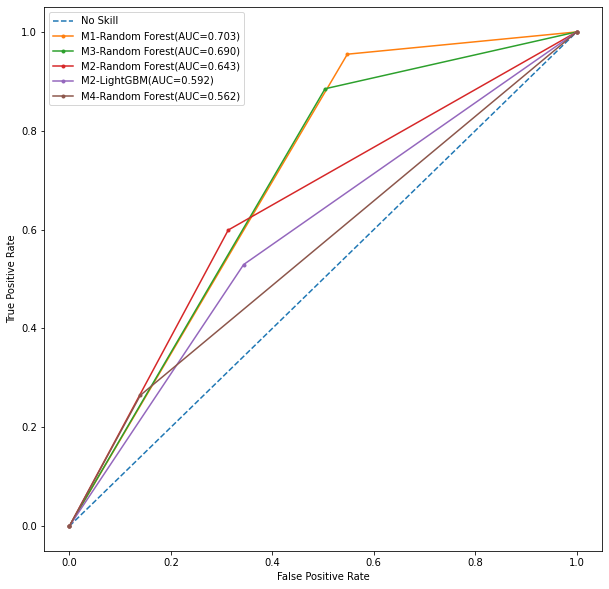

In [ ]:
# Top 5 AUC scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
m1_rf_fpr, m1_rf_tpr, _ = roc_curve(y_test, y_pred_m1_rf)
m3_rf_fpr, m3_rf_tpr, _ = roc_curve(y_test, y_pred_m3_rf)
m2_rf_fpr, m2_rf_tpr, _ = roc_curve(y_test, y_pred_m2_rf)
m2_lgb_fpr, m2_lgb_tpr, _ = roc_curve(y_test, y_pred_m2_lgb)
m4_rf_fpr, m4_rf_tpr, _ = roc_curve(y_test, y_pred_m4_rf)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m1_rf_fpr, m1_rf_tpr, marker='.', label='M1-Random Forest(AUC=0.703)')
pyplot.plot(m3_rf_fpr, m3_rf_tpr, marker='.', label='M3-Random Forest(AUC=0.690)')
pyplot.plot(m2_rf_fpr, m2_rf_tpr, marker='.', label='M2-Random Forest(AUC=0.643)')
pyplot.plot(m2_lgb_fpr, m2_lgb_tpr, marker='.', label='M2-LightGBM(AUC=0.592)')
pyplot.plot(m4_rf_fpr, m4_rf_tpr, marker='.', label='M4-Random Forest(AUC=0.562)')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.rcParams['figure.figsize'] = 10,10

pyplot.show()